# Importing Data and Libraries 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [55]:
df = pd.read_csv(r'C:\Users\madic\OneDrive\Documents\Achievement 6\01 Data\Original Data\Life-Expectancy-Data-Updated.csv', index_col = False)

In [3]:
%matplotlib inline

# GDP per Capita 

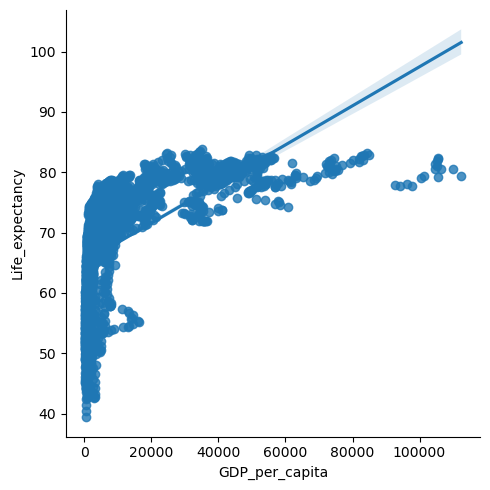

In [6]:
# Create a scatterplot for the "Life Expectancy" and "GDP per Capita" columns in seaborn
sns.lmplot(x = 'GDP_per_capita', y = 'Life_expectancy', data = df)

### Scaling the values using Standard Scaler

In [18]:
# Creating subset of dataframe to only include necessary columns
df_gdp = df[['GDP_per_capita','Life_expectancy']]

In [19]:
df_gdp.head()


,GDP_per_capita,Life_expectancy
0,11006,76.5
1,25742,82.8
2,1076,65.4
3,4146,67.0
4,33995,81.7


In [23]:
#Scale the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
data = df_gdp
scaler = StandardScaler()
gdp_scaled_data = scaler.fit_transform(data)

In [21]:
# Check results 
print(data)

      GDP_per_capita  Life_expectancy
0              11006             76.5
1              25742             82.8
2               1076             65.4
3               4146             67.0
4              33995             81.7
...              ...              ...
2859             399             49.9
2860            2515             66.9
2861            2130             74.3
2862            7424             71.8
2863           48934             82.4

[2864 rows x 2 columns]


In [31]:
print(gdp_scaled_data)

[[-0.03159286  0.81284054]
 [ 0.83872052  1.48277067]
 [-0.61806217 -0.36751255]
 ...
 [-0.55581256  0.57889668]
 [-0.24314704  0.31305139]
 [ 2.20844825  1.44023542]]


In [32]:
# Transform new scaled array into a dataframe
df_gdp = pd.DataFrame(gdp_scaled_data, columns = ['GDP_per_capita','Life_expectancy'])

In [33]:
df_gdp.head()

,GDP_per_capita,Life_expectancy
0,-0.031593,0.812841
1,0.838721,1.482771
2,-0.618062,-0.367513
3,-0.436747,-0.197372
4,1.326146,1.365799


### Clustering 

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [35]:
kmeans.fit(df_gdp)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [36]:
df_gdp['clusters'] = kmeans.fit_predict(df_gdp)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
df_gdp.head()

,GDP_per_capita,Life_expectancy,clusters
0,-0.031593,0.812841,1
1,0.838721,1.482771,0
2,-0.618062,-0.367513,1
3,-0.436747,-0.197372,1
4,1.326146,1.365799,0


In [38]:
df_gdp['clusters'].value_counts()

1    1601
2     802
0     461
Name: clusters, dtype: int64

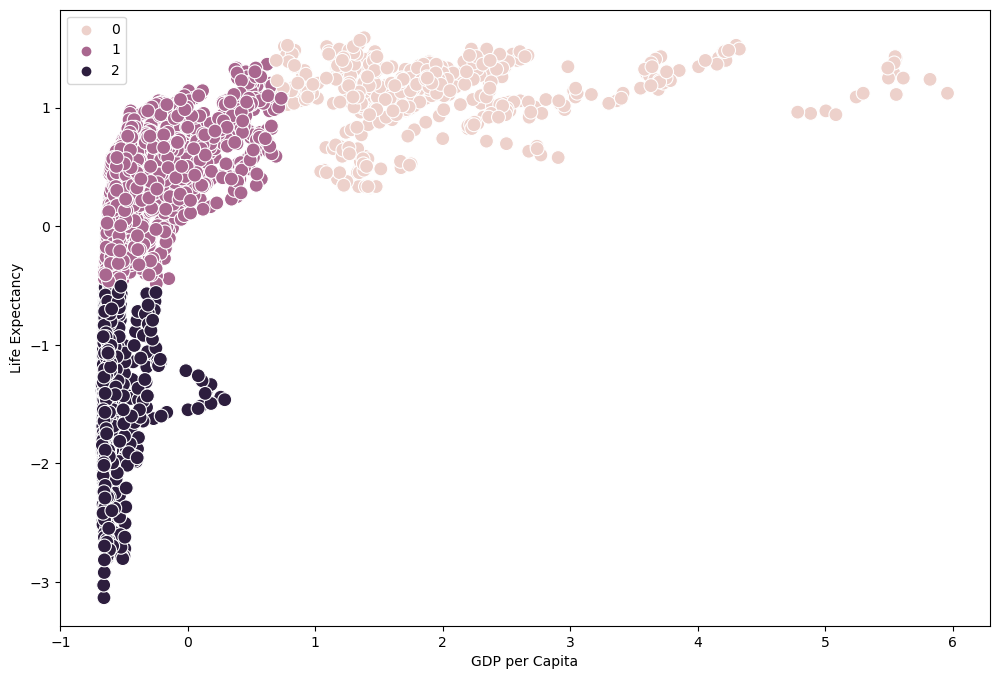

In [39]:
# Plot the clusters for the "Life Expectancy" and "GDP Per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gdp['GDP_per_capita'], y=df_gdp['Life_expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

In [41]:
path = r'C:\Users\madic\OneDrive\Documents\Achievement 6'

In [42]:
df_gdp.to_csv(os.path.join(path, '01 Data','Prepared Data', 'clusters_gdp.csv'))

# Schooling

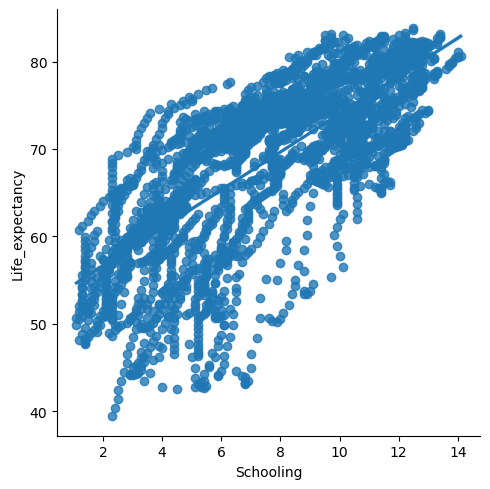

In [4]:
# Create a scatterplot for the "Life Expectancy" and "Schooling" columns in seaborn
sns.lmplot(x = 'Schooling', y = 'Life_expectancy', data = df)

### Scaling values using standard scaler

In [6]:
# Creating subset of dataframe to only include necessary columns
df_school = df[['Schooling','Life_expectancy']]

In [7]:
df_school.head()

,Schooling,Life_expectancy
0,7.8,76.5
1,9.7,82.8
2,5.0,65.4
3,7.9,67.0
4,12.8,81.7


In [8]:
#Scale the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
data = df_school
scaler = StandardScaler()
school_scaled_data = scaler.fit_transform(data)

In [9]:
# Check results
print(data)

      Schooling  Life_expectancy
0           7.8             76.5
1           9.7             82.8
2           5.0             65.4
3           7.9             67.0
4          12.8             81.7
...         ...              ...
2859        1.1             49.9
2860        9.1             66.9
2861       10.3             74.3
2862       11.1             71.8
2863       11.0             82.4

[2864 rows x 2 columns]


In [10]:
print(school_scaled_data)

[[ 0.05294134  0.81284054]
 [ 0.65212105  1.48277067]
 [-0.83006034 -0.36751255]
 ...
 [ 0.8413357   0.57889668]
 [ 1.09362189  0.31305139]
 [ 1.06208612  1.44023542]]


In [11]:
# Transform new scaled array into a dataframe
df_school = pd.DataFrame(school_scaled_data, columns = ['Schooling','Life_expectancy'])

In [12]:
df_school.head()

,Schooling,Life_expectancy
0,0.052941,0.812841
1,0.652121,1.482771
2,-0.830060,-0.367513
3,0.084477,-0.197372
4,1.629730,1.365799


### Clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [14]:
kmeans.fit(df_school)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
df_school['clusters'] = kmeans.fit_predict(df_school)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
df_school.head()

,Schooling,Life_expectancy,clusters
0,0.052941,0.812841,2
1,0.652121,1.482771,1
2,-0.830060,-0.367513,2
3,0.084477,-0.197372,2
4,1.629730,1.365799,1


In [18]:
df_school['clusters'].value_counts()

1    1119
2     948
0     797
Name: clusters, dtype: int64

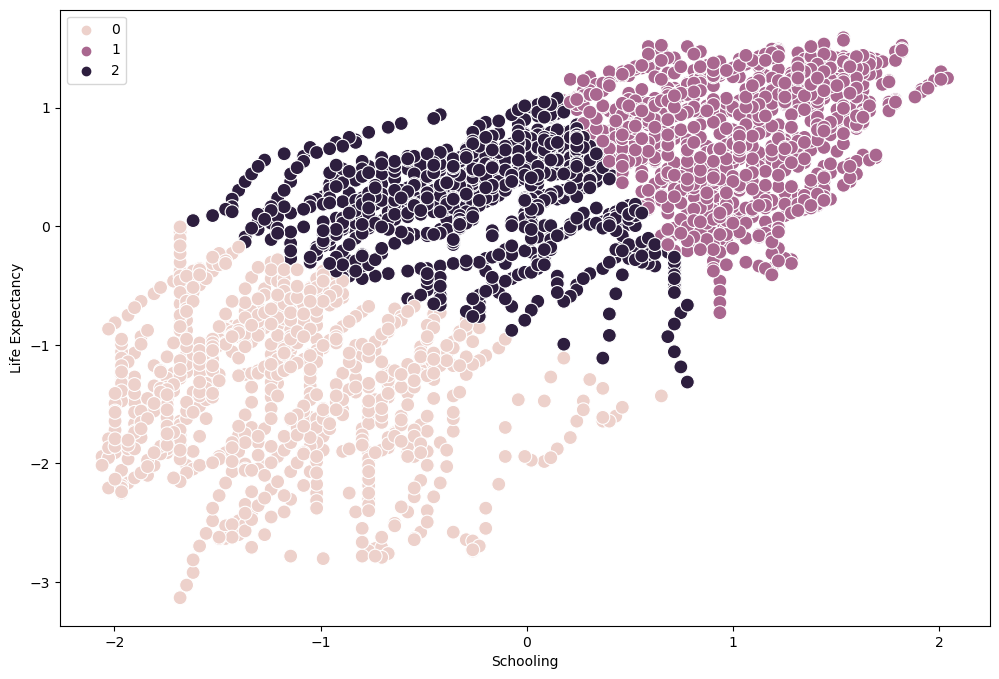

In [19]:
# Plot the clusters for the "Life Expectancy" and "Schooling" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_school['Schooling'], y=df_school['Life_expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Schooling') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

In [20]:
path = r'C:\Users\madic\OneDrive\Documents\Achievement 6'

In [21]:
df_school.to_csv(os.path.join(path, '01 Data','Prepared Data', 'clusters_school.csv'))

# Polio

In [23]:
df['Polio'].head()

0    97
1    97
2    67
3    92
4    94
Name: Polio, dtype: int64

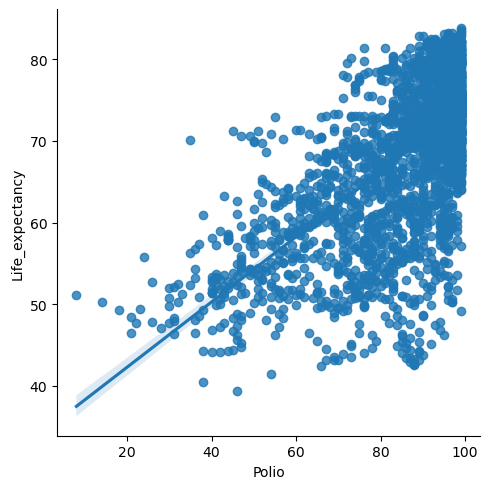

In [24]:
# Create a scatterplot for the "Life Expectancy" and "Polio" columns in seaborn
sns.lmplot(x = 'Polio', y = 'Life_expectancy', data = df)

### Scaling values using standard scaler 

In [56]:
# Creating subset of dataframe to only include necessary columns
df_polio = df[['Polio','Life_expectancy']]

In [57]:
#Scale the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
data = df_polio
scaler = StandardScaler()
polio_scaled_data = scaler.fit_transform(data)

In [58]:
# Check results
print(data)

      Polio  Life_expectancy
0        97             76.5
1        97             82.8
2        67             65.4
3        92             67.0
4        94             81.7
...     ...              ...
2859     41             49.9
2860     96             66.9
2861     97             74.3
2862     97             71.8
2863     95             82.4

[2864 rows x 2 columns]


In [59]:
print(polio_scaled_data)

[[ 0.69641439  0.81284054]
 [ 0.69641439  1.48277067]
 [-1.29327484 -0.36751255]
 ...
 [ 0.69641439  0.57889668]
 [ 0.69641439  0.31305139]
 [ 0.56376844  1.44023542]]


In [60]:
# Transform new scaled array into a dataframe
df_polio = pd.DataFrame(polio_scaled_data, columns = ['Polio','Life_expectancy'])

### Cluster Analysis

In [61]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [62]:
kmeans.fit(df_polio)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [63]:
df_polio['clusters'] = kmeans.fit_predict(df_polio)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
df_polio.head()

,Polio,Life_expectancy,clusters
0,0.696414,0.812841,0
1,0.696414,1.482771,0
2,-1.293275,-0.367513,2
3,0.364800,-0.197372,0
4,0.497445,1.365799,0


In [64]:
df_polio['clusters'].value_counts()

0    1873
1     678
2     313
Name: clusters, dtype: int64

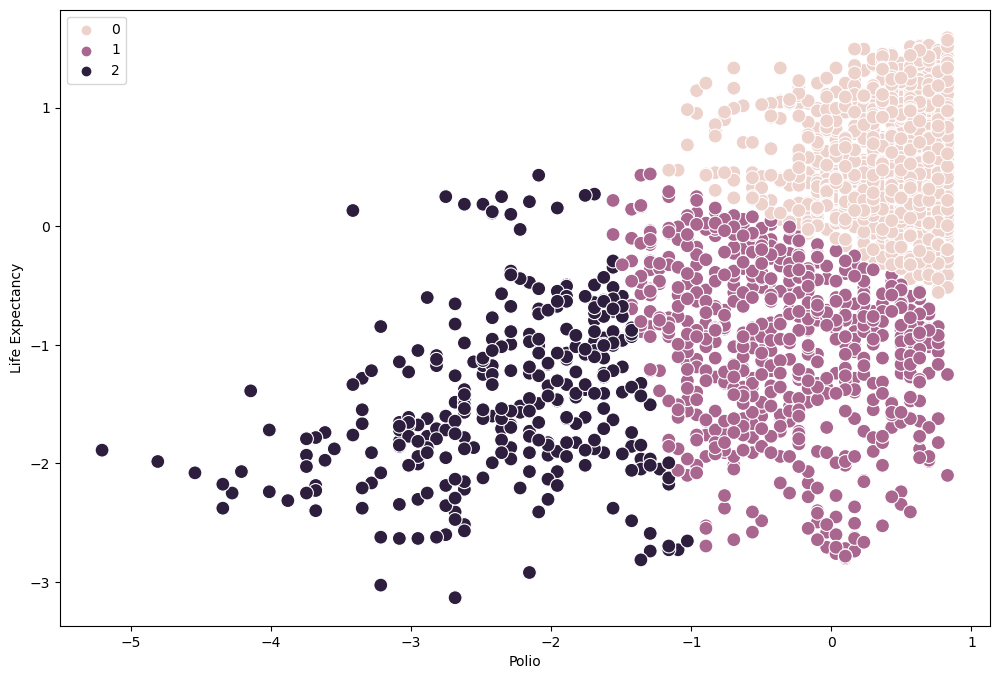

In [65]:
# Plot the clusters for the "Life Expectancy" and "Polio" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_polio['Polio'], y=df_polio['Life_expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Polio') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

In [42]:
df_polio.to_csv(os.path.join(path, '01 Data','Prepared Data', 'clusters_polio.csv'))

# Diphtheria 

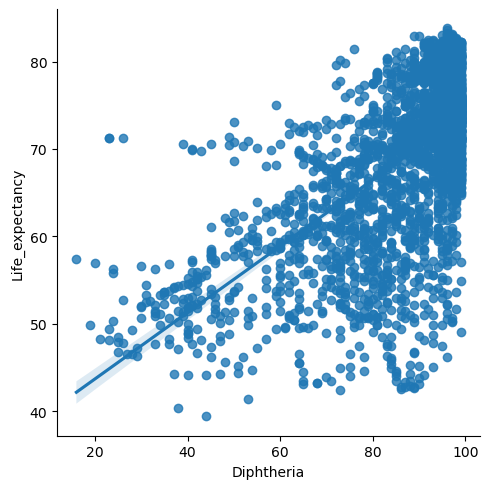

In [66]:
# Create a scatterplot for the "Life Expectancy" and "Diphtheria" columns in seaborn
sns.lmplot(x = 'Diphtheria', y = 'Life_expectancy', data = df)

### Scaling values with standard scaler 

In [67]:
# Creating subset of dataframe to only include necessary columns
df_diph = df[['Diphtheria','Life_expectancy']]

In [68]:
#Scale the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
data = df_diph
scaler = StandardScaler()
diph_scaled_data = scaler.fit_transform(data)

In [69]:
# Transform new scaled array into a dataframe
df_diph = pd.DataFrame(diph_scaled_data, columns = ['Diphtheria','Life_expectancy'])

### Cluster Analysis

In [70]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [71]:
kmeans.fit(df_diph)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [72]:
df_diph['clusters'] = kmeans.fit_predict(df_diph)

C:\Users\madic\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [73]:
df_diph.head()

,Diphtheria,Life_expectancy,clusters
0,0.690747,0.812841,0
1,0.690747,1.482771,0
2,-1.433965,-0.367513,2
3,0.433206,-0.197372,0
4,0.497592,1.365799,0


In [74]:
df_diph['clusters'].value_counts()

0    1854
2     743
1     267
Name: clusters, dtype: int64

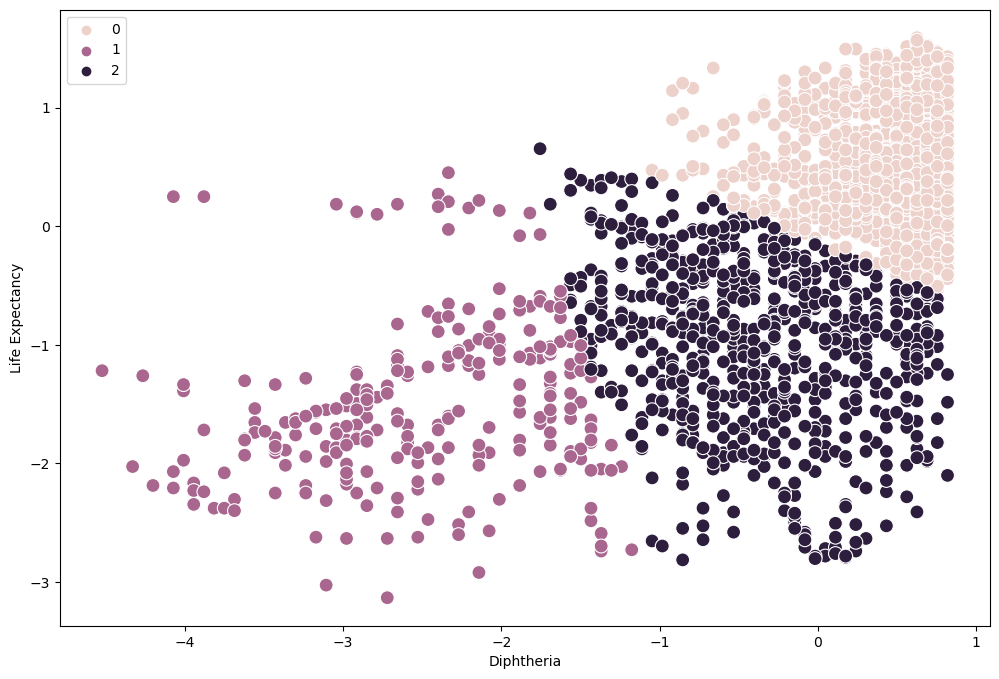

In [75]:
# Plot the clusters for the "Life Expectancy" and "Schooling" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_diph['Diphtheria'], y=df_diph['Life_expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Diphtheria') # Label x-axis.
plt.ylabel('Life Expectancy') # Label y-axis.
plt.show()

In [52]:
df_diph.to_csv(os.path.join(path, '01 Data','Prepared Data', 'clusters_diph.csv'))